In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from CASutils import qbo_utils as qbo
from CASutils import plotting_utils as myplots
from CASutils import colorbar_utils as cbars

In [2]:
plotpath="/project/cas/islas/python_plots/CAM7_vertres_paper/FIGURES/"

In [3]:
basepath="/project/cas/islas/python_savs/CAM7_vertres_paper/DATA_SORT/QBOcomposites/90day_beforeW_powerspec/"

In [4]:
era5_50 = xr.open_dataset(basepath+'ERA5_50hpa_5S5N_90days.nc')
dz1000_50 = xr.open_dataset(basepath+'dz1000_50hpa_5S5N.nc')
dz900_50 = xr.open_dataset(basepath+'dz900_50hpa_5S5N.nc')
dz800_50 = xr.open_dataset(basepath+'dz800_50hpa_5S5N.nc')
dz700_50 = xr.open_dataset(basepath+'dz700_50hpa_5S5N.nc')
dz600_50 = xr.open_dataset(basepath+'dz600_50hpa_5S5N.nc')
dz500_50 = xr.open_dataset(basepath+'dz500_50hpa_5S5N.nc')
dz400_50 = xr.open_dataset(basepath+'dz400_50hpa_5S5N.nc')

In [5]:
dcurves = xr.open_dataset("/project/cas/islas/python_savs/CAM7_vertres_paper/DATA_SORT/dispersion_curves/dispersion_curves.nc")

In [6]:
def oplot_dcurves(ax, dcurves, component='symmetric'):
    if (component == "symmetric"):
        for i in np.arange(0,dcurves.h_e.size,1):
            ax.plot(dcurves.k, dcurves.w_kelvin.isel(h_e=i), color='gray')
            ax.plot(dcurves.k, dcurves.w_ig_n1.isel(h_e=i), color='gray')
            ax.plot(dcurves.k, dcurves.w_etrap.isel(h_e=i), color='gray')
    else:
        for i in np.arange(0,dcurves.h_e.size,1):
            ax.plot(dcurves.k, dcurves.w_mrg.sel(h_e=i), color='gray')
            ax.plot(dcurves.k, dcurves.w_ig_nw.isel(h_e=i), color='gray')
    return ax

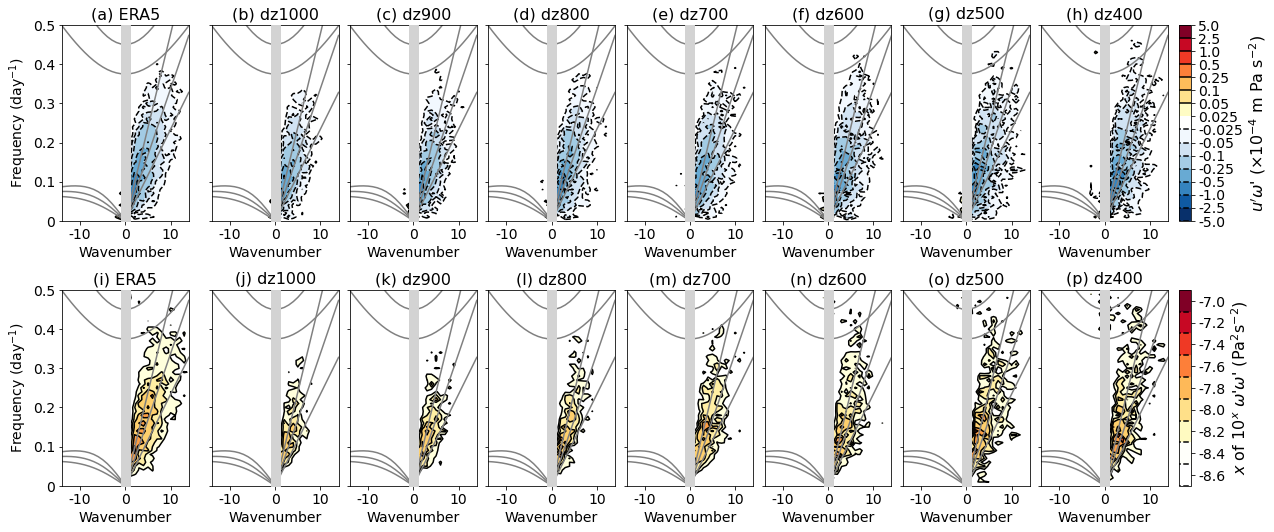

In [7]:
fig = plt.figure(figsize=(16,16))

ci=1e-6 ; cmax=-1e-5 ; cmin=-1e-5
component='symmetric'

#---non-linear contour interval for u'w'
cvals=[-0.0005,-0.00025,-0.0001,-0.00005,-0.000025,-0.00001,-0.000005,-0.0000025,
                0.0000025,0.000005,0.00001,0.000025,0.00005,0.0001,0.00025,0.0005]
cvals_cbar=[ i*10000 for i in cvals ]
ticks=[-5.0,-2.5,-1.0,-0.5,-0.25,-0.1,-0.05,-0.025,0.025,0.05,0.1,0.25,0.5,1.0,2.5,5.0]

xlim=14
ax = myplots.plotWK(fig, era5_50.cospec_uw.sel(component=component).mean('icomp'), era5_50.k, era5_50.w, ci, cmin, cmax,
                    '(a) ERA5',0,0.11,0.8,0.97,contourlinescale=2, cmap='blue2red', xlim=[-1*xlim, xlim],
                    speclevs=cvals)
ax = oplot_dcurves(ax, dcurves, component=component)

ax = myplots.plotWK(fig, dz1000_50.cospec_uw.sel(component=component).mean('icomp'), dz1000_50.k, dz1000_50.w, ci, -1.*cmax, cmax,
                    '(b) dz1000',0.13,0.24,0.8,0.97, ylabel=False, contourlinescale=2, cmap='blue2red', xlim=[-1*xlim, xlim],
                    speclevs=cvals)
ax = oplot_dcurves(ax, dcurves, component=component)


ax = myplots.plotWK(fig, dz900_50.cospec_uw.sel(component=component).mean('icomp'), dz900_50.k, dz900_50.w, ci, -1.*cmax, cmax,
                    '(c) dz900',0.25,0.36,0.8,0.97, ylabel=False, contourlinescale=2, cmap='blue2red', xlim=[-1*xlim, xlim],
                    speclevs=cvals)
ax = oplot_dcurves(ax, dcurves, component=component)

ax = myplots.plotWK(fig, dz800_50.cospec_uw.sel(component=component).mean('icomp'), dz800_50.k, dz800_50.w, ci, -1.*cmax, cmax,
                    '(d) dz800',0.37,0.48,0.8,0.97, ylabel=False, contourlinescale=2, cmap='blue2red', xlim=[-1*xlim, xlim],
                    speclevs=cvals)
ax = oplot_dcurves(ax, dcurves, component=component)

ax = myplots.plotWK(fig, dz700_50.cospec_uw.sel(component=component).mean('icomp'), dz700_50.k, dz700_50.w, ci, -1.*cmax, cmax,
                    '(e) dz700',0.49,0.6,0.8,0.97, ylabel=False, contourlinescale=2, cmap='blue2red', xlim=[-1*xlim, xlim],
                    speclevs=cvals)
ax = oplot_dcurves(ax, dcurves, component=component)

ax = myplots.plotWK(fig, dz600_50.cospec_uw.sel(component=component).mean('icomp'), dz600_50.k, dz600_50.w, ci, -1.*cmax, cmax,
                    '(f) dz600',0.61,0.72,0.8,0.97, ylabel=False, contourlinescale=2, cmap='blue2red', xlim=[-1*xlim, xlim],
                    speclevs=cvals)
ax = oplot_dcurves(ax, dcurves, component=component)

ax = myplots.plotWK(fig, dz500_50.cospec_uw.sel(component=component).mean('icomp'), dz500_50.k, dz500_50.w, ci, -1.*cmax, cmax,
                    '(g) dz500',0.73,0.84,0.8,0.97, ylabel=False, contourlinescale=2, cmap='blue2red', xlim=[-1*xlim, xlim],
                    speclevs=cvals)
ax = oplot_dcurves(ax, dcurves, component=component)

ax = myplots.plotWK(fig, dz400_50.cospec_uw.sel(component=component).mean('icomp'), dz400_50.k, dz400_50.w, ci, -1.*cmax, cmax,
                    '(h) dz400',0.85,0.96,0.8,0.97, ylabel=False, contourlinescale=2, cmap='blue2red', xlim=[-1*xlim, xlim],
                    speclevs=cvals)
ax = oplot_dcurves(ax, dcurves, component=component)

ax = cbars.plotcolorbar_sayc(fig, cvals_cbar,"$u'\omega$' ($\\times$10$^{-4}$ m Pa s$^{-2}$)",0.97,0.98,0.8,0.97,orient='vertical', ticks=ticks,
                            contourlines=True, fsize=14)

#----W power spectrum 50hPa
ci=0.2 ; cmin=-8.6 ; cmax=-7

ax = myplots.plotWK(fig, np.log10(era5_50.cospec_ww.sel(component=component).mean('icomp')), era5_50.k, era5_50.w, ci, cmin, cmax,
                    '(i) ERA5',0.,0.11,0.57,0.74,contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim],posonly=True)
ax = oplot_dcurves(ax, dcurves, component=component)

ax = myplots.plotWK(fig, np.log10(dz1000_50.cospec_ww.sel(component=component).mean('icomp')), dz1000_50.k, dz1000_50.w, ci, cmin, cmax,
                    '(j) dz1000',0.13,0.24,0.57,0.74,ylabel=False, contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim], posonly=True)
ax = oplot_dcurves(ax, dcurves, component=component)

ax = myplots.plotWK(fig, np.log10(dz900_50.cospec_ww.sel(component=component).mean('icomp')), dz900_50.k, dz900_50.w, ci, cmin, cmax,
                    '(k) dz900',0.25,0.36,0.57,0.74,ylabel=False, contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim], posonly=True)
ax = oplot_dcurves(ax, dcurves, component=component)

ax = myplots.plotWK(fig, np.log10(dz800_50.cospec_ww.sel(component=component).mean('icomp')), dz800_50.k, dz800_50.w, ci, cmin, cmax,
                    '(l) dz800',0.37,0.48,0.57,0.74,ylabel=False, contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim], posonly=True)
ax = oplot_dcurves(ax, dcurves, component=component)

ax = myplots.plotWK(fig, np.log10(dz700_50.cospec_ww.sel(component=component).mean('icomp')), dz700_50.k, dz700_50.w, ci, cmin, cmax,
                    '(m) dz700',0.49,0.6,0.57,0.74,ylabel=False, contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim], posonly=True)
ax = oplot_dcurves(ax, dcurves, component=component)

ax = myplots.plotWK(fig, np.log10(dz600_50.cospec_ww.sel(component=component).mean('icomp')), dz600_50.k, dz600_50.w, ci, cmin, cmax,
                    '(n) dz600',0.61,0.72,0.57,0.74,ylabel=False, contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim], posonly=True)
ax = oplot_dcurves(ax, dcurves, component=component)

ax = myplots.plotWK(fig, np.log10(dz500_50.cospec_ww.sel(component=component).mean('icomp')), dz500_50.k, dz500_50.w, ci, cmin, cmax,
                    '(o) dz500',0.73,0.84,0.57,0.74,ylabel=False, contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim], posonly=True)
ax = oplot_dcurves(ax, dcurves, component=component)

ax = myplots.plotWK(fig, np.log10(dz400_50.cospec_ww.sel(component=component).mean('icomp')), dz400_50.k, dz400_50.w, ci, cmin, cmax,
                    '(p) dz400',0.85,0.96,0.57,0.74,ylabel=False, contourlinescale=1, cmap='blue2red', xlim=[-1*xlim, xlim], posonly=True)
ax = oplot_dcurves(ax, dcurves, component=component)

ax = cbars.plotcolorbar_log10(fig, ci, cmin, cmax,"$x$ of 10$^{x}$ $\omega$'$\omega$' (Pa$^{2}$s$^{-2}$)", 0.97,0.98,0.57,0.74,orient='vertical', contourlines=True,
                              posonly=True, ticklabel10=False, fsize=14)

fig.savefig(plotpath+'fig6.pdf', bbox_inches='tight', facecolor='white')

In [8]:
import importlib
importlib.reload(cbars)

<module 'CASutils.colorbar_utils' from '/home/islas/python/CASanalysis/CASutils/colorbar_utils.py'>

In [10]:
dz400_test = dz400_50.cospec_uw.sel(component='symmetric').mean('icomp')
dz500_test = dz500_50.cospec_uw.sel(component='symmetric').mean('icomp')
dz600_test = dz600_50.cospec_uw.sel(component='symmetric').mean('icomp')
dz700_test = dz700_50.cospec_uw.sel(component='symmetric').mean('icomp')
dz800_test = dz800_50.cospec_uw.sel(component='symmetric').mean('icomp')
dz900_test = dz900_50.cospec_uw.sel(component='symmetric').mean('icomp')
dz1000_test = dz1000_50.cospec_uw.sel(component='symmetric').mean('icomp')

w_rad_per_day = dz400_test.w * (2 * np.pi /86400.)
k_rad_per_m = dz400_test.k / (6.371e6)
cphase = w_rad_per_day / k_rad_per_m

In [11]:
dz400_test_stack = dz400_test.stack(z=('w','k'))
dz500_test_stack = dz500_test.stack(z=('w','k'))
dz600_test_stack = dz600_test.stack(z=('w','k'))
dz700_test_stack = dz700_test.stack(z=('w','k'))
dz800_test_stack = dz800_test.stack(z=('w','k'))
dz900_test_stack = dz900_test.stack(z=('w','k'))
dz1000_test_stack = dz1000_test.stack(z=('w','k'))
cphase_stack = cphase.stack(z=('w','k'))

In [12]:
from CASutils import plothisto_utils as plothisto

In [13]:
def bin_along_cphase(dat, cphase, cphase_bins):
    indices = np.array(np.argsort(cphase))
    dat_sort = dat[indices]
    cphase_sort = cphase[indices]
    idx = np.searchsorted(cphase_sort, cphase_bins)
    dat_chunks = np.split(dat_sort, idx)
    dat_bind = []
    for i in np.arange(0,len(cphase_bins),1):
        dat_bind.append(dat_chunks[i].sum('z'))
    dat_bind = xr.concat(dat_bind, dim='cphase')
    dat_bind['cphase'] = cphase_bins
    return dat_bind

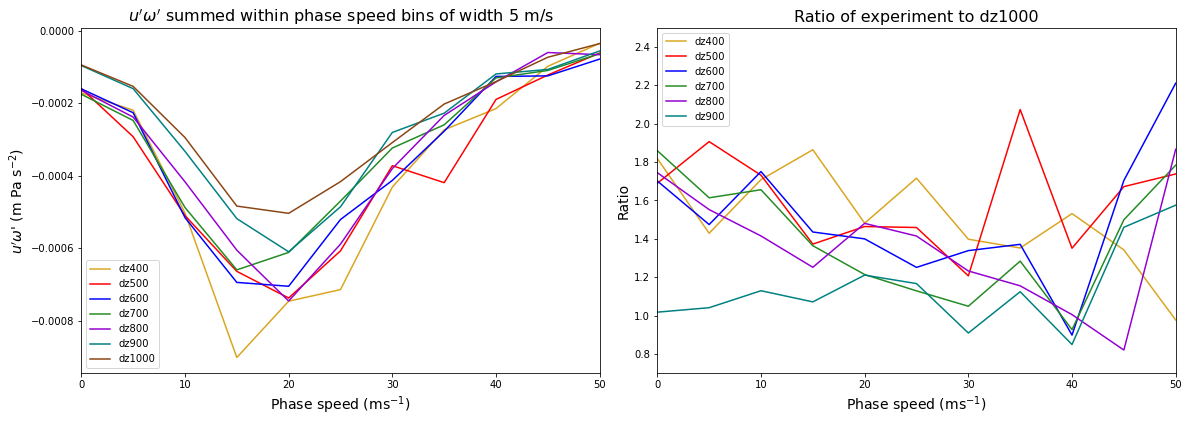

In [15]:
fig = plt.figure(figsize=(16,16))

dz400_bind = bin_along_cphase(dz400_test_stack, cphase_stack, np.arange(0,55,5))
dz500_bind = bin_along_cphase(dz500_test_stack, cphase_stack, np.arange(0,55,5))
dz600_bind = bin_along_cphase(dz600_test_stack, cphase_stack, np.arange(0,55,5))
dz700_bind = bin_along_cphase(dz700_test_stack, cphase_stack, np.arange(0,55,5))
dz800_bind = bin_along_cphase(dz800_test_stack, cphase_stack, np.arange(0,55,5))
dz900_bind = bin_along_cphase(dz900_test_stack, cphase_stack, np.arange(0,55,5))
dz1000_bind = bin_along_cphase(dz1000_test_stack, cphase_stack, np.arange(0,55,5))


ax = fig.add_axes([0.05,0.7,0.45,0.3])
ax.set_xlim(0,50)
ax.set_ylabel("$u'\omega$' (m Pa s$^{-2}$)", fontsize=14)
ax.set_title("$u'\omega'$ summed within phase speed bins of width 5 m/s", fontsize=16)
ax.set_xlabel('Phase speed (ms$^{-1}$)', fontsize=14)
#ax.plot(cphase_stack, dz400_test_stack,"o", label='dz400')
ax.plot(dz400_bind.cphase, dz400_bind, color='goldenrod', label='dz400')
ax.plot(dz500_bind.cphase, dz500_bind, color='red', label='dz500')
ax.plot(dz600_bind.cphase, dz600_bind, color='blue', label='dz600')
ax.plot(dz700_bind.cphase, dz700_bind, color='forestgreen', label='dz700')
ax.plot(dz800_bind.cphase, dz800_bind, color='darkviolet', label='dz800')
ax.plot(dz900_bind.cphase, dz900_bind, color='teal', label='dz900')
ax.plot(dz1000_bind.cphase, dz1000_bind, color='saddlebrown', label='dz1000')
#ax.plot(cphase_stack, dz1000_test_stack,"o", label='dz1000')

ax.legend()

ax = fig.add_axes([0.55,0.7,0.45,0.3])
ax.set_ylabel("Ratio", fontsize=14)
ax.set_title("Ratio of experiment to dz1000", fontsize=16)
ax.set_xlabel('Phase speed (ms$^{-1}$)', fontsize=14)
ax.set_xlim(0,50)
ax.set_ylim(0.7,2.5)
ax.plot(dz400_bind.cphase,dz400_bind / dz1000_bind, color='goldenrod', label='dz400')
ax.plot(dz500_bind.cphase,dz500_bind / dz1000_bind, color='red', label='dz500')
ax.plot(dz600_bind.cphase,dz600_bind / dz1000_bind, color='blue', label='dz600')
ax.plot(dz700_bind.cphase,dz700_bind / dz1000_bind, color='forestgreen', label='dz700')
ax.plot(dz800_bind.cphase,dz800_bind / dz1000_bind, color='darkviolet', label='dz800')
ax.plot(dz900_bind.cphase,dz900_bind / dz1000_bind, color='teal', label='dz900')

ax.legend()


In [53]:
print(dz400_bind)

<xarray.DataArray 'cospec_uw' (cphase: 20)> Size: 160B
array([-1.71336513e-04, -2.19221884e-04, -5.03266940e-04, -9.01945993e-04,
       -7.46492555e-04, -7.14509249e-04, -4.31331529e-04, -2.73403021e-04,
       -2.14739368e-04, -9.80047702e-05, -3.45191879e-05, -2.77011633e-05,
       -2.12846647e-05, -2.40712581e-05, -3.90530814e-06, -5.20225444e-06,
       -2.04824489e-06, -7.97428282e-07, -2.23667395e-06, -2.37023698e-06])
Coordinates:
    zlon       float64 8B 0.0
    ilev       float64 8B 51.23
    pre        int32 4B 50
    component  <U13 52B 'symmetric'
  * cphase     (cphase) int64 160B 0 5 10 15 20 25 30 ... 65 70 75 80 85 90 95
